# Using AI to Solve Problems and Gain Insights in the Boston Airbnb Market


## Introduction

Artificial Intelligence (AI) is reshaping various industries, and the Airbnb market in Boston is no exception. As the demand for short-term rentals continues to grow, Airbnb hosts and guests face a range of challenges that can significantly impact profitability, satisfaction, and decision-making. These challenges stem from factors like fluctuating pricing, guest satisfaction metrics, and the unpredictability of booking patterns. With the abundance of data available through Airbnb listings, there is an opportunity to leverage AI to address these challenges in a meaningful way. By analyzing these data, we can uncover insights that can drastically improve the experience for both hosts and guests, ultimately leading to more informed decisions and better outcomes in the competitive market.

In this project, we delve into the complexities of the Boston Airbnb market using data from Kaggle’s Boston Airbnb Open Data. Our primary focus is on three key issues that Airbnb hosts face: dynamic pricing, understanding the factors influencing guest satisfaction, and predicting booking likelihood. By applying AI techniques, we aim to uncover trends, predict future outcomes, and provide actionable insights that will empower Airbnb hosts to make smarter decisions regarding pricing, guest relationships, and marketing strategies.

## Key Problems in the Boston Airbnb Market

- **Dynamic Pricing**  
  One of the most critical challenges faced by Airbnb hosts is determining the optimal price for their listing. Pricing in a competitive market like Airbnb is highly fluid and depends on multiple factors, including seasonality, location, nearby events, and market demand. Hosts must continuously adjust their pricing strategies to maximize revenue while staying competitive. The core issue here is the difficulty in predicting the best price point for a listing, given the dynamic nature of the market and the constant fluctuation of variables.

- **Guest Satisfaction and Rating Factors**  
  The importance of guest reviews cannot be overstated in the Airbnb ecosystem. Positive guest ratings can lead to higher visibility and more bookings, while negative reviews can significantly impact a listing’s performance. However, understanding the exact factors that lead to high or low ratings is complex. Is it the cleanliness of the property, the quality of amenities, or the responsiveness of the host that matters most to guests? Identifying these underlying factors is essential for hosts who want to improve their service and attract better ratings and, consequently, more bookings.

- **Booking Likelihood**  
  Predicting whether a listing will be booked is crucial for hosts to effectively manage their expectations and optimize their listings. Various factors contribute to the likelihood of a booking, including the listing’s features, pricing, location, and seasonal trends. The challenge here is determining which factors have the most significant influence on booking probability, allowing hosts to make more accurate predictions and adjust their marketing strategies accordingly.

In this project, we aim to tackle these problems by applying AI techniques. Through data-driven insights and predictive modeling, we will help Airbnb hosts in Boston optimize their pricing strategies, understand the drivers of guest satisfaction, and predict the likelihood of bookings more accurately. Our goal is to equip hosts with the tools they need to maximize their revenue, improve guest experiences, and navigate the dynamic nature of the Airbnb market.

## Methodology

To address the challenges outlined in the project, we will implement a structured methodology using Artificial Intelligence (AI) and machine learning techniques. Our approach will involve several key steps to ensure comprehensive analysis and actionable insights for Airbnb hosts in Boston.

### Step 1: Data Preprocessing & Cleaning

Before any analysis or modeling can take place, it is essential to prepare the dataset. In this step, we will:
- **Handle Missing Data**: Identify and fill or remove missing values to ensure the dataset is complete and ready for analysis.
- **Encode Categorical Variables**: Convert categorical variables (e.g., property type, neighborhood) into numerical representations so that they can be used in machine learning models.
- **Standardize Numerical Features**: Scale numerical features (e.g., prices, ratings, number of reviews) to ensure consistency across the dataset and improve model performance.

### Step 2: Exploratory Data Analysis (EDA)

EDA will be conducted to explore and visualize the data for better understanding:
- **Distribution Analysis of Numerical Columns**: Explore the distribution of numerical features such as price, ratings, and availability to understand the data's spread and any potential outliers.
- **Correlation Matrix of Numeric Features**: Analyze correlations between key numeric variables like price, ratings, and occupancy to identify potential predictors.
- **Histogram Distribution of Categorical Columns**: Visualize the distribution of categorical features such as property type, room type, and cancellation policy to understand the frequency of different categories.

### Step 3: AI-Powered Predictive Modeling

Using machine learning algorithms, we will build predictive models to tackle the challenges identified:
- **Price Prediction**: To optimize pricing strategies, we will apply regression model, specifically linear regression, to predict the most appropriate price for each listing based on various features property attributes.
- **Rating Prediction**: By using classification models we aim to predict the likelihood of a guest rating a property highly or poorly. This will help identify key factors that influence guest satisfaction.
- **Booking Likelihood**: We will build probabilistic models (such as SVMA, Random Forest) to predict the likelihood that a listing will be booked. Factors such as listing quality, location, pricing, various categorical features will be considered.

### Step 4: AI-Generated Insights & Recommendations

Based on the predictive models, we will generate actionable insights:
- **Pricing Recommendations**: Offer dynamic pricing strategies that adjust based on demand, competition, and location-specific trends.
- **Guest Experience Improvement**: Provide recommendations for hosts on the aspects of their listings that need attention (e.g., amenities, cleanliness) to improve guest satisfaction and ratings.
- **Booking Optimization**: Identify patterns and recommend strategies for hosts to maximize occupancy rates, such as adjusting pricing or offering promotions during off-peak seasons.

## Tools & Technologies Used

- **Dataset**: Boston Airbnb Open Data (from Kaggle) will serve as the primary data source for the project.
- **Libraries**: We will use libraries such as Pandas, NumPy, Matplotlib, and Seaborn for data manipulation, visualization, and analysis.
- **Machine Learning Frameworks**: Scikit-learn, Random FOrest, and other libraries will be used to build and evaluate machine learning models for regression and classification tasks.


## Impact of AI on the Airbnb Market

- **For Hosts**: AI-driven models will enable hosts to optimize pricing, improve their guest ratings, and predict booking likelihood, leading to better revenue management and more informed decisions.
- **For Guests**: By offering smarter price predictions and personalized recommendations, AI can enhance the guest experience, leading to more enjoyable stays and greater satisfaction.
- **For Researchers**: The application of AI in the sharing economy is an emerging field, and this project will contribute valuable insights to the growing body of research in this area.

Through the use of AI, we aim to help Airbnb hosts and guests make better, data-driven decisions in the dynamic Boston market.

# Basic Preprocessing & EDA

Import Libraries

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [2]:
df = pd.read_csv('listings.csv')

Remove Duplicates, Nulls, Fill NAN values with Mean, Fix Monetery columns & and select relavent columns

In [3]:
df_cleaned = df.drop_duplicates()

df_cleaned = df_cleaned.dropna(how="all")

for feature in ["cleaning_fee", "security_deposit", "price"]:
    df_cleaned[feature] = df_cleaned[feature].astype(str).str.replace("$", "").str.replace(",", "", regex=True)
    df_cleaned[feature] = pd.to_numeric(df_cleaned[feature], errors="coerce")  # Convert invalid to NaN
    df_cleaned[feature] = df_cleaned[feature].fillna(df_cleaned[feature].median())  # Fill NaNs

In [ ]:
selected_columns = [
    'id','latitude','longitude',"host_neighbourhood", "host_listings_count", "host_total_listings_count",
    "host_verifications", "host_has_profile_pic", "host_identity_verified",
    "neighbourhood_cleansed", "property_type", "room_type", "accommodates",
    "bathrooms", "bedrooms", "beds", "bed_type", "price", "security_deposit",
    "cleaning_fee", "guests_included", "extra_people", "minimum_nights",
    "maximum_nights", "availability_30", "availability_365", "number_of_reviews",
    "review_scores_rating",'instant_bookable', "cancellation_policy"
]
existing_columns = [col for col in selected_columns if col in df_cleaned.columns]
df_filtered = df_cleaned[existing_columns]

# Fill NaN values with Mean
numeric_cols = df_filtered.select_dtypes(include=['number']).columns
df_filtered[numeric_cols] = df_filtered[numeric_cols].fillna(df_filtered[numeric_cols].mean())

categorical_cols = df_filtered.select_dtypes(include=['object']).columns
df_filtered[categorical_cols] = df_filtered[categorical_cols].fillna(df_filtered[categorical_cols].mode().iloc[0])

In [5]:
print("First few rows after preprocessing:")
display(df_filtered.head())
print("Number of rows in the dataset:", df_filtered.shape[0])

if df_filtered.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values in the dataset.")

if df_filtered.isna().values.any():
    print("There are NaN values in the dataset.")
else:
    print("No NaN values in the dataset.")

First few rows after preprocessing:


,id,latitude,longitude,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy
0,12147973,42.282619,-71.133068,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,Roslindale,...,1,$0.00,2,1125,0,0,0,91.916667,f,moderate
1,3075044,42.286241,-71.134374,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,Roslindale,...,0,$0.00,2,15,26,359,36,94.000000,t,moderate
2,6976,42.292438,-71.135765,Roslindale,1,1,"['email', 'phone', 'reviews', 'jumio']",t,t,Roslindale,...,1,$20.00,3,45,19,319,41,98.000000,f,moderate
3,1436513,42.281106,-71.121021,Allston-Brighton,1,1,"['email', 'phone', 'reviews']",t,f,Roslindale,...,2,$25.00,1,1125,6,98,1,100.000000,f,moderate
4,7651065,42.284512,-71.136258,Roslindale,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,Roslindale,...,1,$0.00,2,31,13,334,29,99.000000,f,flexible


Number of rows in the dataset: 3585
No missing values in the dataset.
No NaN values in the dataset.


Distribution Analysis of Numerical Columns

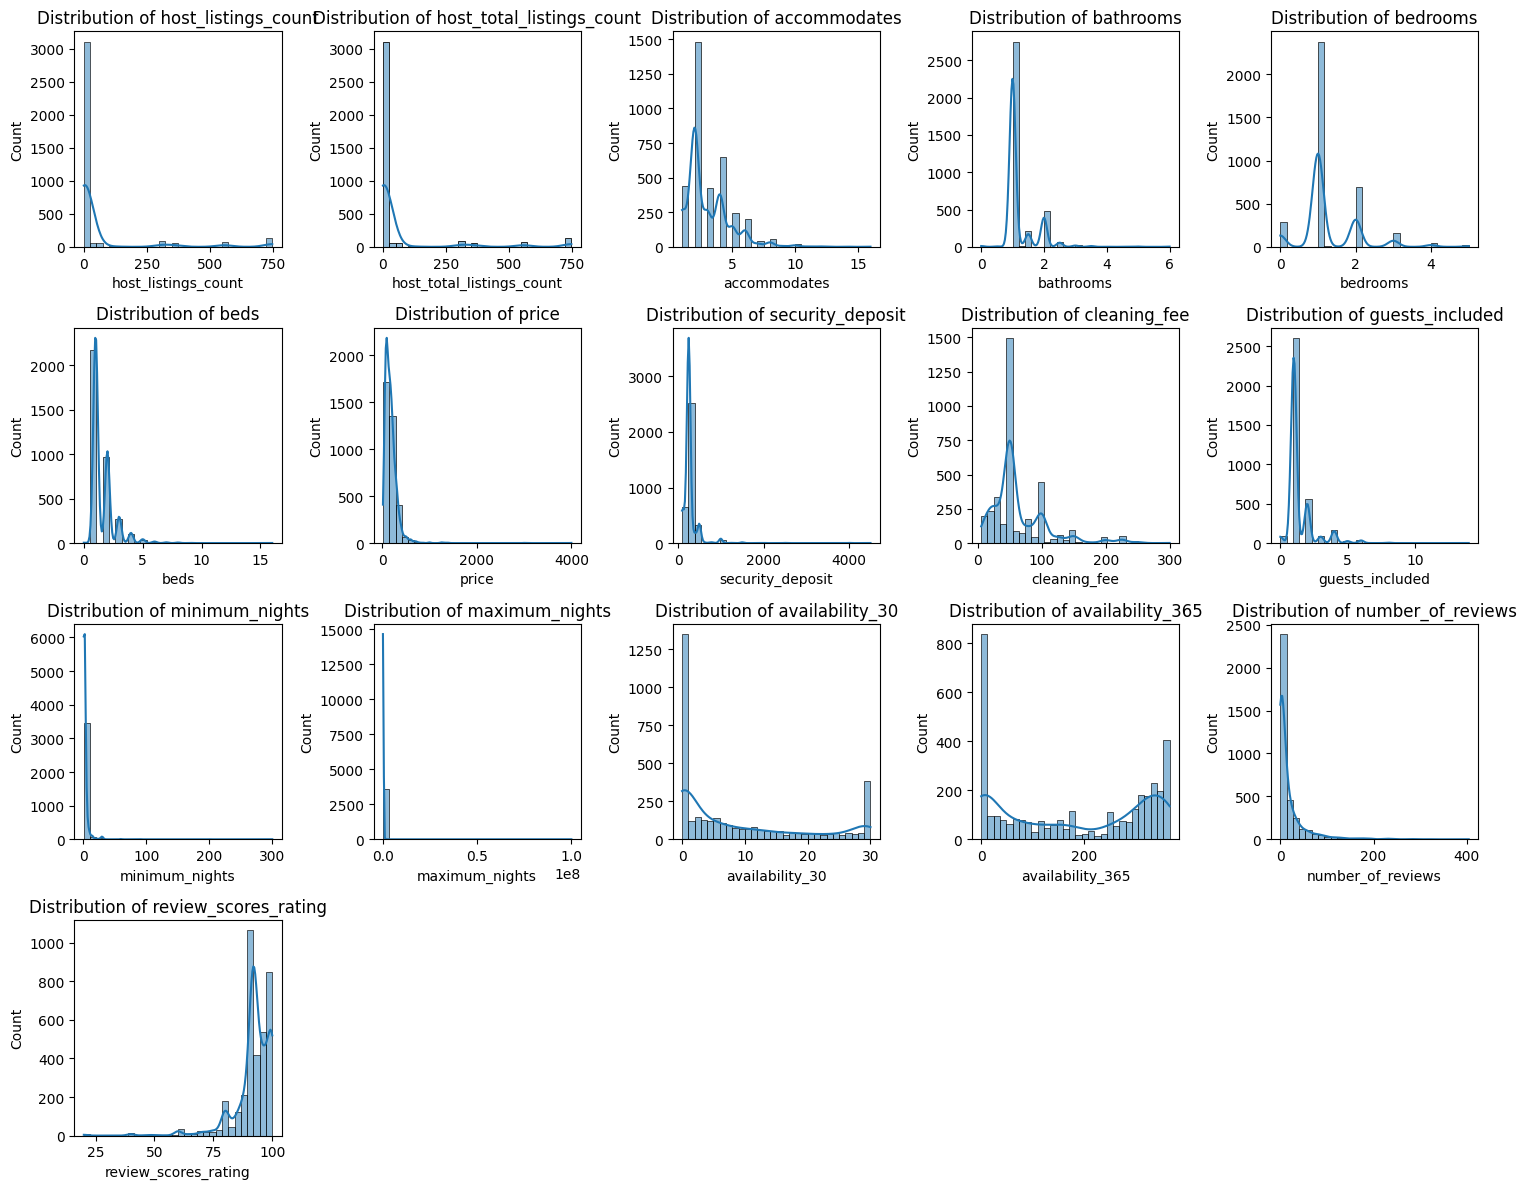

In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

numeric_cols = df_filtered.select_dtypes(include=[np.number]).columns
excluded_cols = ['id', 'latitude', 'longitude']
numeric_cols = [col for col in numeric_cols if col not in excluded_cols]
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df_filtered[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

Correlation Matrix of Numeric Features

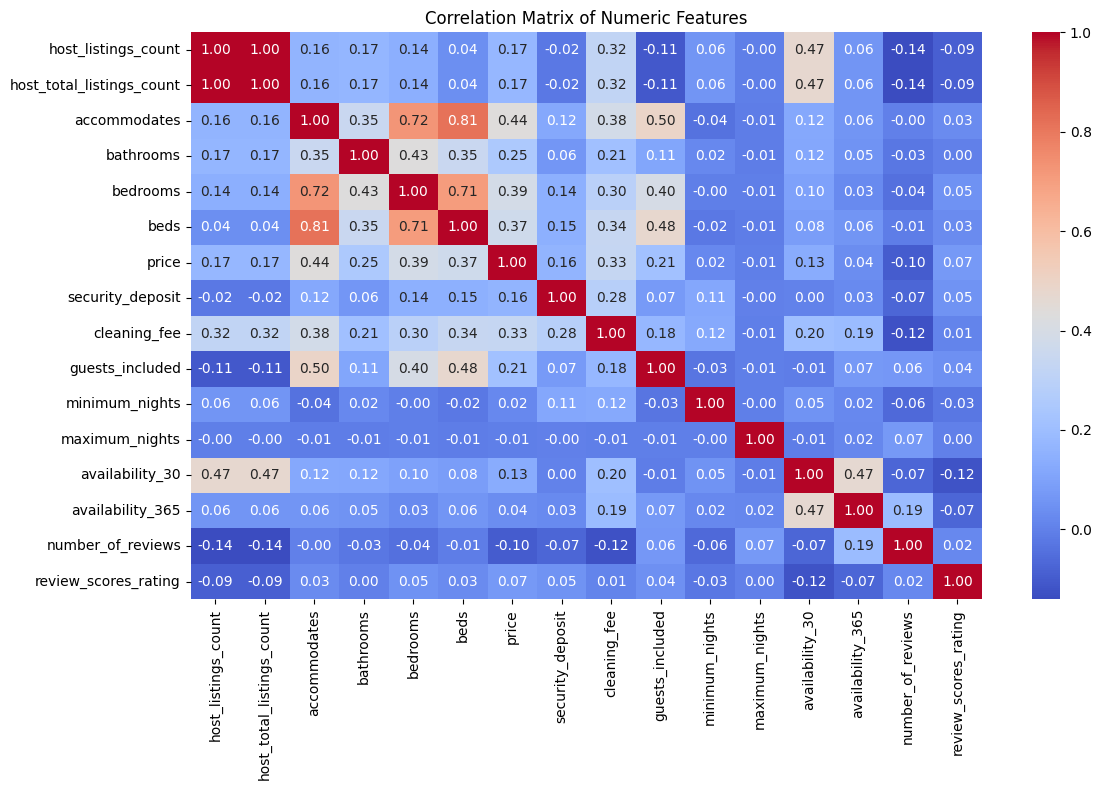

In [7]:
corr_matrix = df_filtered[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

Histogram Distribution of Categorical Columns

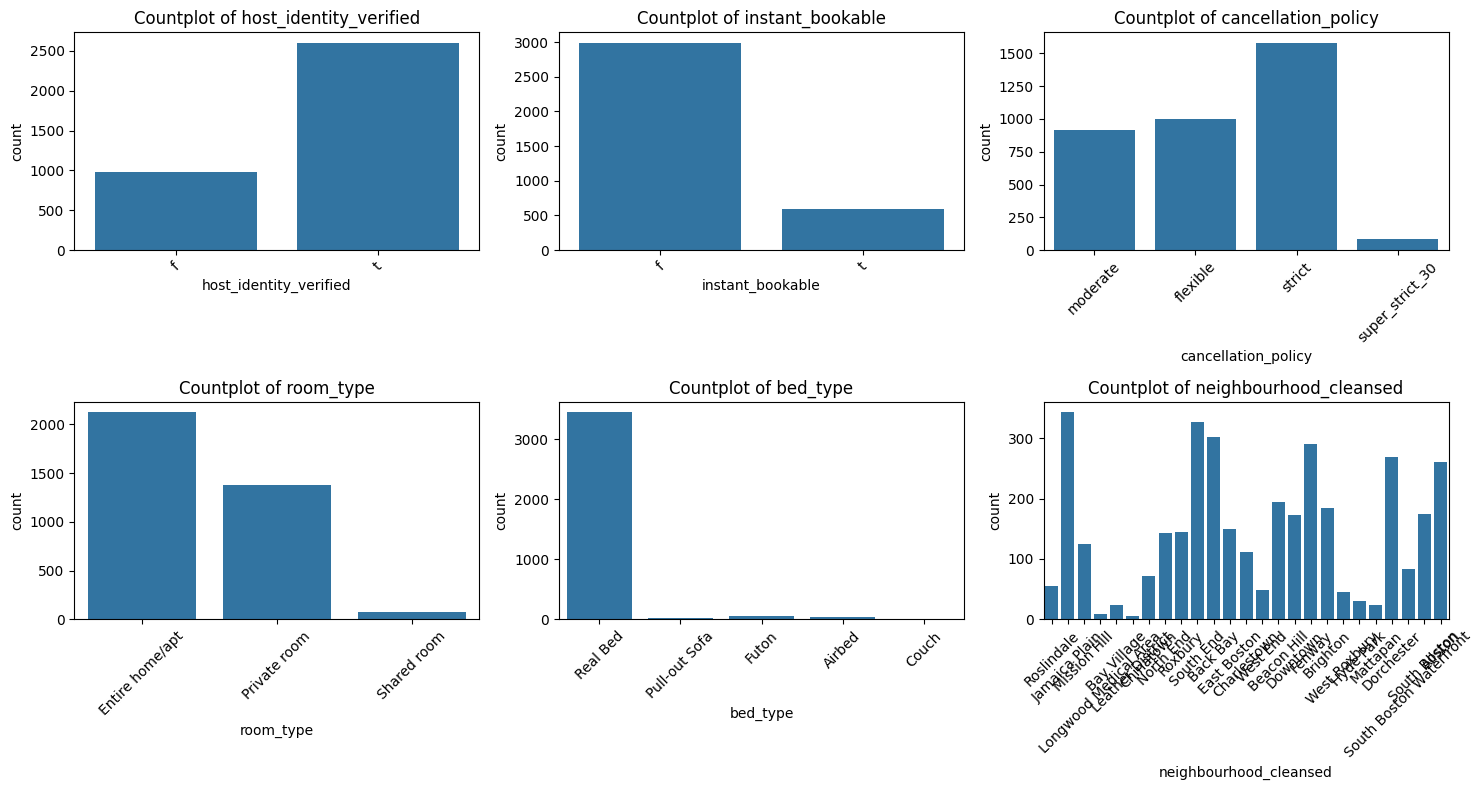

In [8]:
selected_categorical_cols = [
    'host_identity_verified', 'instant_bookable',
    'cancellation_policy', 'room_type', 'bed_type', 'neighbourhood_cleansed'
]
n_cols = 3
n_rows = (len(selected_categorical_cols) // n_cols) + (len(selected_categorical_cols) % n_cols > 0)
plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(selected_categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=df_filtered[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# AI MODELS

### How much should your Airbnb listing be listed at. Forecasting Price using AI.

We will be using these features to predict price based on EDA and Domain Knowedge with the help of Linear Regression.


*  accommodates
*  bathrooms
*  bedrooms
*  beds
*  security_deposit
*  cleaning_fee
*  guests_included
*  review_scores_rating






Select and scale the columns

In [9]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for regression analysis
selected_features = ["accommodates","bathrooms", "bedrooms", "beds", "security_deposit",
                     "cleaning_fee", "guests_included","review_scores_rating", "price"]
df_regression = df_filtered[selected_features]

# Apply StandardScaler
scaler = StandardScaler()
df_regression.iloc[:, :-1] = scaler.fit_transform(df_regression.iloc[:, :-1])

# Display the first few rows after normalization
print("First few rows after normalization:")
display(df_regression.head())

First few rows after normalization:


<ipython-input-9-3da509773b76>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.53900431 -0.58542423 -0.58542423 ...  0.53900431 -0.58542423
 -0.58542423]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_regression.iloc[:, :-1] = scaler.fit_transform(df_regression.iloc[:, :-1])
<ipython-input-9-3da509773b76>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.40680531 -1.35320184 -0.40680531 ... -0.40680531 -0.40680531
 -0.40680531]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_regression.iloc[:, :-1] = scaler.fit_transform(df_regression.iloc[:, :-1])


,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,review_scores_rating,price
0,0.539004,0.556221,0.989563,1.376715,-0.136827,-0.637220,-0.406805,0.000000,250.0
1,-0.585424,-0.442906,-0.340395,-0.602832,-0.895283,-1.212232,-1.353202,0.248608,65.0
2,-0.585424,-0.442906,-0.340395,-0.602832,-0.136827,-0.292212,-0.406805,0.725936,65.0
3,0.539004,-0.442906,-0.340395,0.386942,-0.870816,-0.292212,0.539591,0.964600,75.0
4,-0.585424,0.556221,-0.340395,0.386942,-0.136827,-1.097230,-0.406805,0.845268,79.0


Split the data & Train model

In [10]:
from sklearn.model_selection import train_test_split

X = df_regression.drop(columns=["price"])
y = df_regression["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

Metrics- MAE,MSE,RMSE,R^2

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 66.25
Mean Squared Error (MSE): 23008.85
Root Mean Squared Error (RMSE): 151.69
R² Score: 0.1961


### Can we predict if an Airbnb listing will receive a high rating score & What features contribute the most to it.

Random Forest Classifier is used here.

The main advantage of Random Forest is its ability to handle large datasets with higher dimensionality and manage missing data effectively. It also provides robust performance even when there is noise in the data, as the model relies on averaging multiple trees, which helps minimize bias and variance. Additionally, Random Forest offers feature importance, which can be used to identify the most influential variables in the dataset

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

Target Variable and relavent columns

In [ ]:
df_filtered['high_rating'] = df_filtered['review_scores_rating'].apply(lambda x: 1 if x >= 80 else 0)

selected_features = [
    "host_neighbourhood", "property_type", "room_type", "accommodates", "bathrooms",
    "bedrooms", "beds", "price", "security_deposit", "cleaning_fee", "guests_included",
    "number_of_reviews", "instant_bookable", "cancellation_policy"
]

Train the random forest classifier

In [15]:
X = df_filtered[selected_features]
y = df_filtered['high_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['number']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), X.select_dtypes(include=['object']).columns)
    ])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
clf.fit(X_train, y_train)

# Predict model
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.9568
Precision: 0.9592
Recall: 0.9971
F1 Score: 0.9777


PLot the feature importance graph

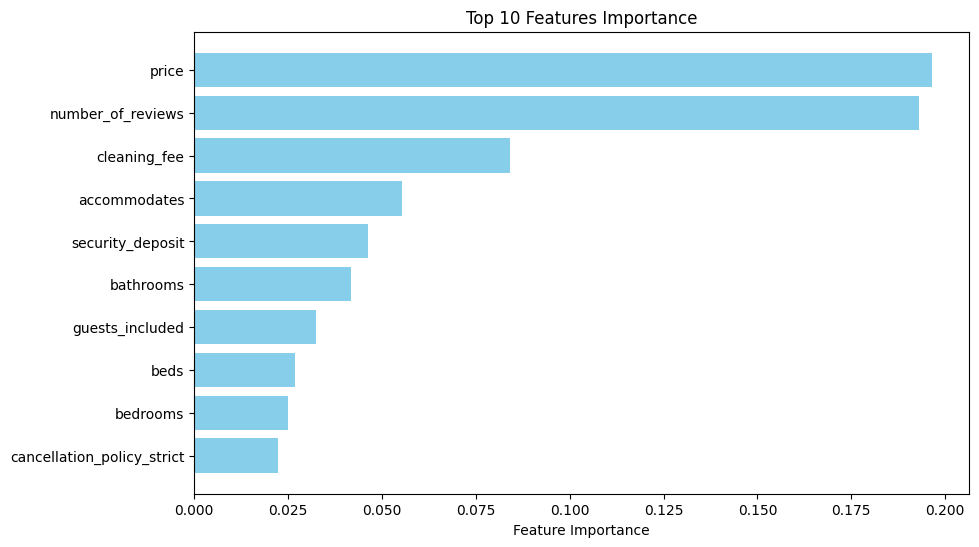

In [16]:
#Plot feature importance
importances = clf.named_steps['classifier'].feature_importances_
features = list(X.select_dtypes(include=['number']).columns) + \
           list(clf.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(X.select_dtypes(include=['object']).columns))

# Sort features by importance
indices = importances.argsort()[::-1][:10]
top_features = [features[i] for i in indices]
top_importances = importances[indices]

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Features Importance')
plt.gca().invert_yaxis()
plt.show()

The host should concentrate on the features which contribute the most to the high rating score

### What are the locations with the highest booking probability & What do these locations have in common?

Import Libraries

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
import folium
import matplotlib.pyplot as plt
import seaborn as sns

Define Target variabe & Select Relavent Features

In [ ]:
# Define the target variable: Booked (1 if available for booking, 0 otherwise)
df_filtered["booked"] = (df_filtered["availability_30"] == 0).astype(int)

# Define feature columns
numeric_features = [
    "host_listings_count", "host_total_listings_count", "accommodates", "bathrooms", "bedrooms", "beds", "price",
    "security_deposit", "cleaning_fee", "guests_included", "minimum_nights", "maximum_nights",
    "availability_30", "availability_365", "number_of_reviews", "review_scores_rating", "latitude", "longitude"
]

categorical_features = [
    "host_neighbourhood", "host_verifications", "host_has_profile_pic", "host_identity_verified",
    "neighbourhood_cleansed", "property_type", "room_type", "bed_type", "instant_bookable", "cancellation_policy"
]


Model Specific Preprocessing

In [19]:
# Preprocessing pipeline (StandardScaler for numeric features, OneHotEncoder for categorical features)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Prepare the dataset for training
X = df_filtered[numeric_features + categorical_features]
y = df_filtered["booked"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


We test out different Models(SVM, RANDOM FORESTM, KNN), Comparing metrics for each

Model Accuracy Comparison:
SVM: 0.9874
Random Forest: 0.9958
KNN: 0.7908


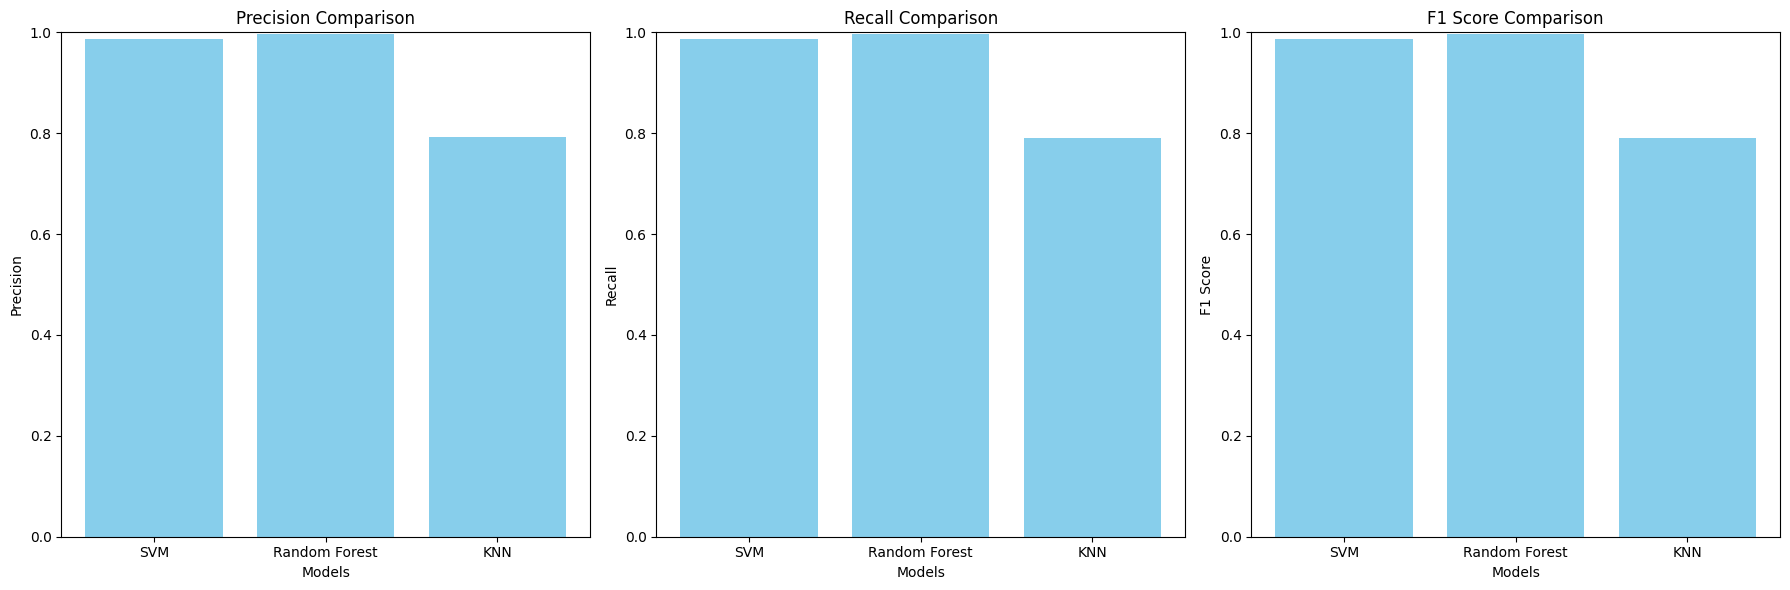

In [20]:
# Define models for comparison
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
}

# Evaluate each model
accuracies = {}
precision = {}
recall = {}
f1_score = {}

for model_name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)

    # Collect metrics
    accuracies[model_name] = accuracy_score(y_test, y_pred)

    # classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    precision[model_name] = report['weighted avg']['precision']
    recall[model_name] = report['weighted avg']['recall']
    f1_score[model_name] = report['weighted avg']['f1-score']

# Print Accuracy
print("Model Accuracy Comparison:")
for model_name, acc in accuracies.items():
    print(f"{model_name}: {acc:.4f}")

# Visualization for Precision, Recall, and F1 Score
metrics = ['Precision', 'Recall', 'F1 Score']

metric_values = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    axes[i].bar(metric_values[metric].keys(), metric_values[metric].values(), color='skyblue')
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

Random Forest acheived the highest accuracy of 99.58% and performed better across all other metrics- so we select it.

Here we display the top locations which have the highest booking liklihood

In [21]:
# Predict booking probability for all listings using the best model
best_model_name = "Random Forest"
best_model = models[best_model_name]
best_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", best_model)
])

best_pipeline.fit(X_train, y_train)
df_filtered["predicted_booking"] = best_pipeline.predict(X)

# Find the most in-demand locations (those predicted to be booked)
high_demand_locations = df_filtered[df_filtered["predicted_booking"] == 1][["latitude", "longitude", "neighbourhood_cleansed", "price", "room_type"]]

# Display the top 10 locations with the highest predicted booking probability
print("\nTop Locations with High Booking Probability:")
display(high_demand_locations.head(10))

# sort and display locations based on price
sorted_locations = high_demand_locations.sort_values(by="price", ascending=False)
print("\nTop Locations by Price (Highest First):")
print(sorted_locations.head(10))

# Create an interactive map with high-demand locations
avg_lat = df_filtered["latitude"].mean()
avg_lon = df_filtered["longitude"].mean()

m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

for _, row in high_demand_locations.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"Price: ${row['price']}\nRoom Type: {row['room_type']}\nNeighbourhood: {row['neighbourhood_cleansed']}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

m.save("high_demand_locations_map.html")
print("Interactive map saved as 'high_demand_locations_map.html'")


Top Locations with High Booking Probability:


<ipython-input-21-e7899366939b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["predicted_booking"] = best_pipeline.predict(X)


,latitude,longitude,neighbourhood_cleansed,price,room_type
0,42.282619,-71.133068,Roslindale,250.0,Entire home/apt
12,42.291723,-71.131556,Roslindale,93.0,Entire home/apt
17,42.291815,-71.131588,Roslindale,75.0,Private room
18,42.282225,-71.115189,Roslindale,49.0,Private room
19,42.282802,-71.115145,Roslindale,49.0,Private room
21,42.294035,-71.132237,Roslindale,120.0,Entire home/apt
22,42.280528,-71.130843,Roslindale,70.0,Private room
23,42.278383,-71.128780,Roslindale,150.0,Entire home/apt
24,42.276831,-71.129560,Roslindale,175.0,Entire home/apt
25,42.290904,-71.130238,Roslindale,95.0,Private room



Top Locations by Price (Highest First):
       latitude  longitude   neighbourhood_cleansed   price        room_type
3055  42.348358 -71.039875  South Boston Waterfront  3000.0  Entire home/apt
793   42.338626 -71.083315                  Roxbury  1400.0     Private room
2204  42.345201 -71.088918                   Fenway  1372.0     Private room
1950  42.358363 -71.068408              Beacon Hill  1345.0  Entire home/apt
2448  42.341858 -71.089044                   Fenway  1275.0     Private room
3096  42.352427 -71.042562  South Boston Waterfront  1250.0  Entire home/apt
1262  42.349971 -71.081032                 Back Bay  1250.0  Entire home/apt
1896  42.358002 -71.068956              Beacon Hill  1235.0  Entire home/apt
3242  42.336417 -71.047694             South Boston  1000.0  Entire home/apt
1399  42.351257 -71.084352                 Back Bay   975.0  Entire home/apt
Interactive map saved as 'high_demand_locations_map.html'


Visualization of price distribution, room types, price geographical distrition of high booking liklihood locations

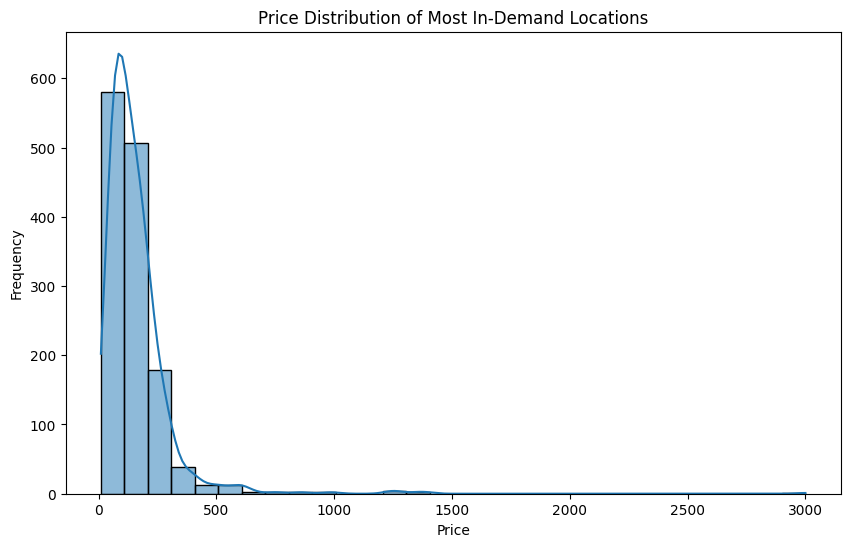

<ipython-input-22-0df617ae9445>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=high_demand_locations, x='room_type', palette='Set2')


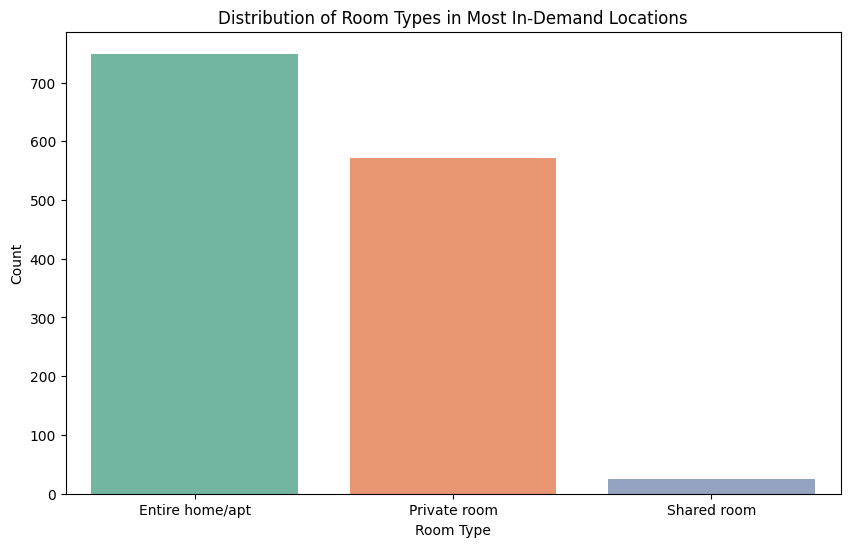

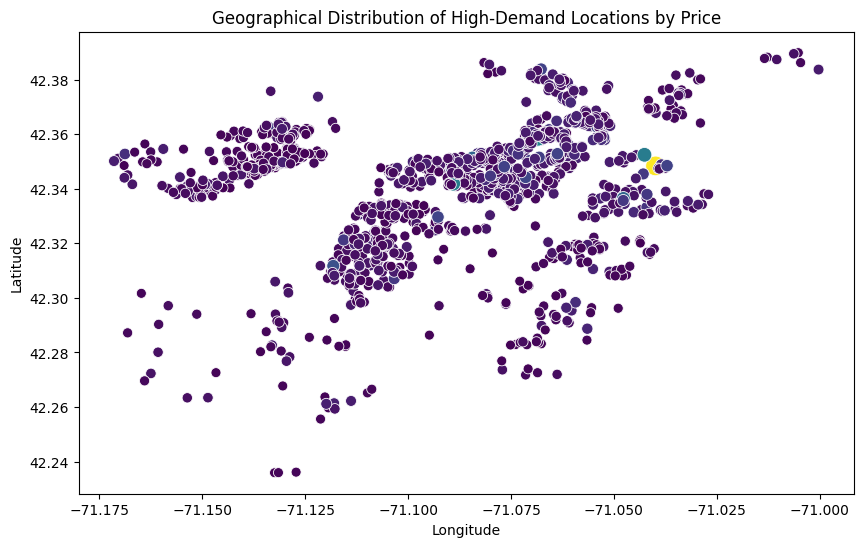

In [22]:
# Visualize the price distribution of the most in-demand locations
plt.figure(figsize=(10, 6))
sns.histplot(high_demand_locations["price"], bins=30, kde=True)
plt.title('Price Distribution of Most In-Demand Locations')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# Visualize the Room Type distribution of the most in-demand locations
plt.figure(figsize=(10, 6))
sns.countplot(data=high_demand_locations, x='room_type', palette='Set2')
plt.title('Distribution of Room Types in Most In-Demand Locations')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

# Plot the geographical distribution of prices for high-demand locations on a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=high_demand_locations, x='longitude', y='latitude', hue='price', palette='viridis', size='price', sizes=(50, 200), legend=None)
plt.title('Geographical Distribution of High-Demand Locations by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Common Statistics of high booking liklihood listings the Hosts should look into

In [23]:
# Statistics of properties in high-probability booking locations
statistics = high_demand_locations.describe()
print("\nStatistics of Listings in High Booking Probability Locations:")
display(statistics)

# Additional statistics for categorical variables like 'room_type'
room_type_counts = high_demand_locations['room_type'].value_counts()
print("\nRoom Type Distribution in High Booking Probability Locations:")
display(room_type_counts)

# Calculate the mean price for each room type in high-demand locations
mean_price_by_room_type = high_demand_locations.groupby('room_type')['price'].mean()
print("\nMean Price by Room Type in High Booking Probability Locations:")
display(mean_price_by_room_type)


Statistics of Listings in High Booking Probability Locations:


,latitude,longitude,price
count,1346.000000,1346.000000,1346.000000
mean,42.339931,-71.088841,159.320208
std,0.023338,0.032002,157.664570
min,42.235942,-71.171469,10.000000
25%,42.330017,-71.111864,75.000000
50%,42.345024,-71.082229,129.500000
75%,42.353900,-71.064544,199.000000
max,42.389828,-71.000261,3000.000000



Room Type Distribution in High Booking Probability Locations:


,count
room_type,
Entire home/apt,749
Private room,572
Shared room,25



Mean Price by Room Type in High Booking Probability Locations:


,price
room_type,
Entire home/apt,209.218959
Private room,96.998252
Shared room,90.280000


# Summary

The project leverages AI and machine learning to analyze the Boston Airbnb market, focusing on three core challenges: dynamic pricing, guest satisfaction, and booking likelihood. Using the Boston Airbnb Open Dataset, the analysis follows a structured methodology:

- **Data Preprocessing**: Cleaning, handling missing values, encoding categorical variables, and standardizing features.
- **Exploratory Data Analysis (EDA)**: Visualizing distributions, correlations, and categorical trends (e.g., price skewness, neighborhood popularity, room-type preferences).
- **Predictive Modeling**:
  - **Price Prediction**: Linear regression to determine optimal listing prices based on features like property type, location, and amenities.
  - **Rating Prediction**: Classification models to identify factors influencing guest satisfaction (e.g., cleanliness, host responsiveness).
  - **Booking Likelihood**: Random Forest models to predict occupancy rates using features like availability, pricing, and reviews.
- **AI-Generated Insights**: Actionable recommendations for hosts, including dynamic pricing adjustments, amenity improvements, and seasonal promotions.

Tools included Pandas, Scikit-learn, and geospatial libraries (Folium/GeoPandas). The project emphasizes data-driven decisions to enhance host revenue, guest experiences, and market competitiveness.

---

# Discussion

- **Data Quality**: The dataset required significant cleaning (e.g., handling monetary columns like price, cleaning_fee). Missing values were addressed using medians/modes, and categorical variables (e.g., property_type, neighbourhood) were encoded for modeling.
  
- **Model Selection**: Linear regression and Random Forest were chosen for their interpretability and performance in regression/classification tasks. Geospatial analysis highlighted location-based trends.

### Key Challenges:
- **Dynamic Pricing**: Seasonal demand, neighborhood popularity, and property attributes (e.g., bedrooms, bathrooms) significantly influenced pricing.
- **Guest Satisfaction**: Cleanliness, host verification, and review scores were critical to high ratings.
- **Booking Likelihood**: Availability, instant booking options, and competitive pricing drove occupancy rates.


---

# Findings

### Price Drivers:
- **Location**: Neighborhoods like Downtown commanded higher prices.
- **Property Features**: Larger accommodations (accommodates, bedrooms) and amenities (security_deposit, cleaning_fee) correlated with higher prices.
- **Seasonality**: availability_365 inversely impacted pricing.

### Guest Satisfaction:
- High ratings were strongly linked to review_scores_rating, cleanliness, and host reliability (host_identity_verified).
- Listings with flexible cancellation policies (cancellation_policy) and instant booking options (instant_bookable) received better reviews.

### Booking Trends:
- Listings with frequent reviews (number_of_reviews) and shorter minimum_nights restrictions had higher occupancy.
- Competitive pricing relative to similar properties improved booking rates.

---

# Recommendations:
- Adjust prices dynamically based on demand cycles and local events.
- Prioritize cleanliness, responsive communication, and verified host profiles.
- Optimize listings for shorter stays and promote instant booking features.

---

# Conclusion

The project successfully identified actionable insights to address key challenges in the Boston Airbnb market. Future work could include real-time pricing algorithms, sentiment analysis of reviews, and A/B testing of recommended strategies. By integrating AI-driven insights, hosts can better navigate market dynamics, while guests benefit from improved experiences and value.